<a href="https://colab.research.google.com/github/Karthik-karnam/FMML-Labs/blob/main/Module1_Lab2_FMML20210611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel


We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints] 
  return predlabel

In [ ]:
# sample code to understand the Random classifier function
tranie=[1,2,2,2,3,5,4,5,6,1,6]
classes = np.unique(tranie)
print(classes)
rints=[3,3,3,3,3,3]
predlabel1 = classes[rints]
print(predlabel1)

[1 2 3 4 5 6]
[4 4 4 4 4 4]


Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1st **Question**

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.1/100)
valpred = NN(traindata, trainlabel, valdata)
acc1 = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", acc1)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 25/100)
valpred = NN(traindata, trainlabel, valdata)
acc2 = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", acc2)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 50/100)
valpred = NN(traindata, trainlabel, valdata)
acc3 = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", acc3)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
acc4 = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", acc4)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99.9/100)
valpred = NN(traindata, trainlabel, valdata)
acc5 = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", acc5)

Validation accuracy of nearest neighbour is  0.26564774381368267
Validation accuracy of nearest neighbour is  0.3116264038135251
Validation accuracy of nearest neighbour is  0.327336817795065
Validation accuracy of nearest neighbour is  0.34755661501787843
Validation accuracy of nearest neighbour is  0.5


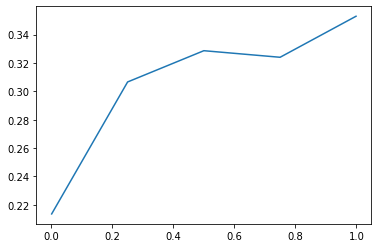

In [ ]:
acc = np.array([acc1, acc2, acc3, acc4, acc5])
perc = np.array([0.1/100, 25/100, 50/100, 75/100 , 99.9/100]) # these are the split percentages
plt.plot(perc, acc)

The accuracy of validation set increases if we decrease the percentage of validation set and if we increase the percentage of validation set then accuracy will decrease.

2nd **Question**

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.1/100)
testpred = NN(valdata, vallabel, testdata)
Accu1 = Accuracy(testlabel, testpred)
print('Test accuracy is ', Accu1)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 25/100)
testpred = NN(valdata, vallabel, testdata)
Accu2 = Accuracy(testlabel, testpred)
print('Test accuracy is ', Accu2)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 50/100)
testpred = NN(valdata, vallabel, testdata)
Accu3 = Accuracy(testlabel, testpred)
print('Test accuracy is ', Accu3)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
testpred = NN(valdata, vallabel, testdata)
Accu4 = Accuracy(testlabel, testpred)
print('Test accuracy is ', Accu4)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99.9/100)
testpred = NN(valdata, vallabel, testdata)
Accu5 = Accuracy(testlabel, testpred)
print('Test accuracy is ', Accu5)

Test accuracy is  0.34917953667953666
Test accuracy is  0.34025096525096526
Test accuracy is  0.33494208494208494
Test accuracy is  0.3144305019305019
Test accuracy is  0.2430019305019305


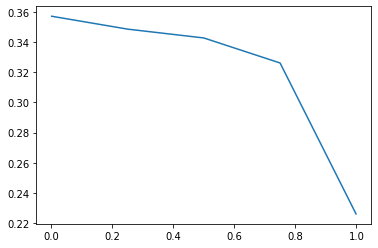

In [ ]:
Accu=np.array([Accu1,Accu2,Accu3,Accu4,Accu5])
percentage=np.array([0.1/100, 25/100, 50/100, 75/100, 99.9/100])
plt.plot(percentage,Accu)

The accuracy on the test set using the validation set increases if we increase the size of the validation set and the accuracy will decrease if we decrease the size of the validation set

3rd **Question**

I think it would be much better if we reserve the 20% of data for the validation set in the traning set.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1st **Question**

Yes , averaging the validation accuracy accross multiple splits gives more consistent results.

2nd **Question**

Yes , it gives accurate estimate of test accuracy

3rd **Question**

In [ ]:

accu1=AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN)
print('Average validation accuracy is ', accu1)

accu2=AverageAccuracy(alltraindata, alltrainlabel, 75/100, 30, classifier=NN)
print('Average validation accuracy is ', accu2)

accu3=AverageAccuracy(alltraindata, alltrainlabel, 75/100, 50, classifier=NN)
print('Average validation accuracy is ', accu3)

accu4=AverageAccuracy(alltraindata, alltrainlabel, 75/100, 70, classifier=NN)
print('Average validation accuracy is ', accu4)

accu5=AverageAccuracy(alltraindata, alltrainlabel, 75/100, 90, classifier=NN)
print('Average validation accuracy is ', accu5)


Average validation accuracy is  0.33828741781544613
Average validation accuracy is  0.3394359925464788
Average validation accuracy is  0.3412459763098646
Average validation accuracy is  0.34071710253506254
Average validation accuracy is  0.34005297056585565


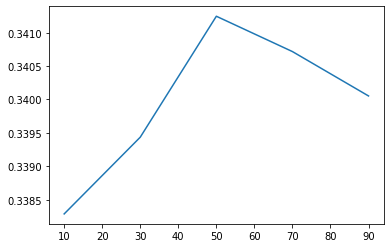

In [ ]:
accuracy=np.array([accu1,accu2,accu3,accu4,accu5])
itr=np.array([10,30,50,70,90])

plt.plot(itr,accuracy)

As the iterations gets increased then the average of validation accuracy is more accurate . As the iterations are low then it is not sure that the validation accuracy is accurate because the validatiion accracy changes with the spliting of dataset.

4th **Question**

Yes, we can deal with very a small train dataset or validation dataset